In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

In [34]:
df=pd.read_csv('/penguins_size.csv')
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


##1) Univariant Analysis

<ipython-input-6-db4e78369663>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df.culmen_length_mm)


<Axes: ylabel='Density'>

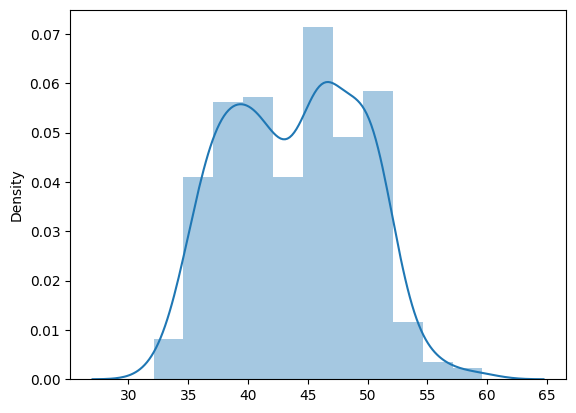

In [6]:
sns.distplot(x=df.culmen_length_mm)

##2) Bi-variant Analysis

<Axes: xlabel='culmen_depth_mm', ylabel='culmen_length_mm'>

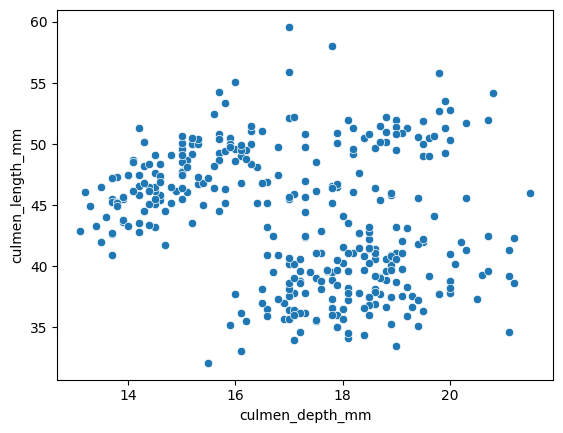

In [7]:
sns.scatterplot(x=df.culmen_depth_mm,y=df.culmen_length_mm)

##3) Multi-variant Analysis

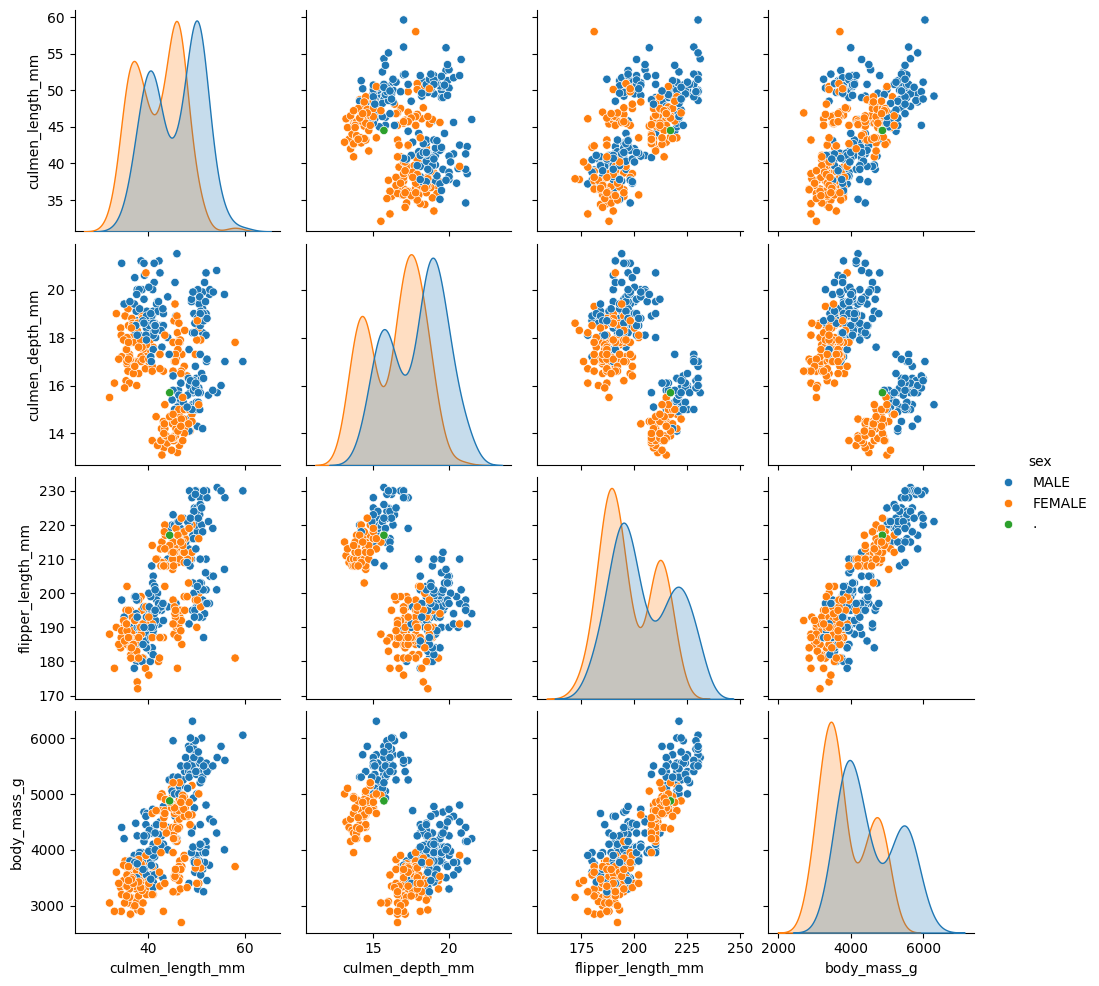

In [8]:
sns.pairplot(df,hue='sex')

##4) Descriptive Statistics

In [9]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


##5) Correlation of the data

<Axes: >

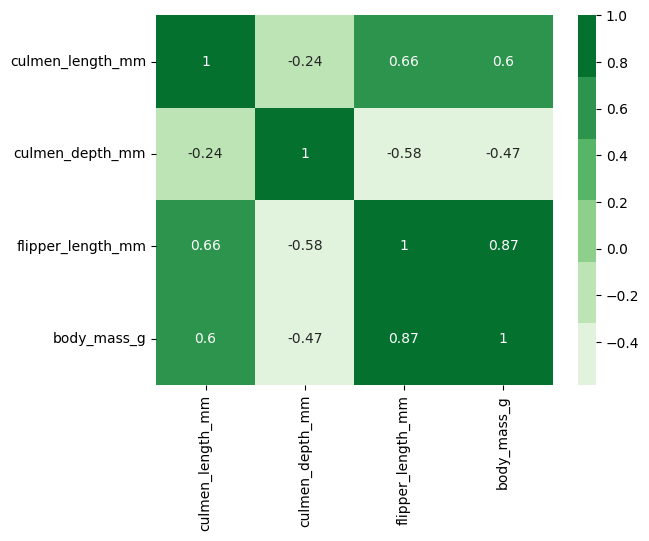

In [10]:
df1=df.iloc[:,2:6]
cor=df1.corr()
colormap=sns.color_palette('Greens')
sns.heatmap(cor,annot=True,cmap=colormap)

##6) Checking for missing values and dealing with them

In [35]:
df.isnull().any()

species              False
island               False
culmen_length_mm      True
culmen_depth_mm       True
flipper_length_mm     True
body_mass_g           True
sex                   True
dtype: bool

In [36]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

For numerical column

In [37]:
df['culmen_length_mm']=df['culmen_length_mm'].fillna(df['culmen_length_mm'].mean())
df['culmen_depth_mm']=df['culmen_depth_mm'].fillna(df['culmen_depth_mm'].mean())
df['flipper_length_mm']=df['flipper_length_mm'].fillna(df['flipper_length_mm'].mean())
df['body_mass_g']=df['body_mass_g'].fillna(df['body_mass_g'].mean())

In [38]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      0
culmen_depth_mm       0
flipper_length_mm     0
body_mass_g           0
sex                  10
dtype: int64

##7) Outlier detection and  replacing them

In [40]:
df.head(10)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,MALE
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,FEMALE
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,FEMALE
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,NaN
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,FEMALE
5,Adelie,Torgersen,39.30000,20.60000,190.000000,3650.000000,MALE
6,Adelie,Torgersen,38.90000,17.80000,181.000000,3625.000000,FEMALE
7,Adelie,Torgersen,39.20000,19.60000,195.000000,4675.000000,MALE
8,Adelie,Torgersen,34.10000,18.10000,193.000000,3475.000000,NaN
9,Adelie,Torgersen,42.00000,20.20000,190.000000,4250.000000,NaN


<Axes: ylabel='flipper_length_mm'>

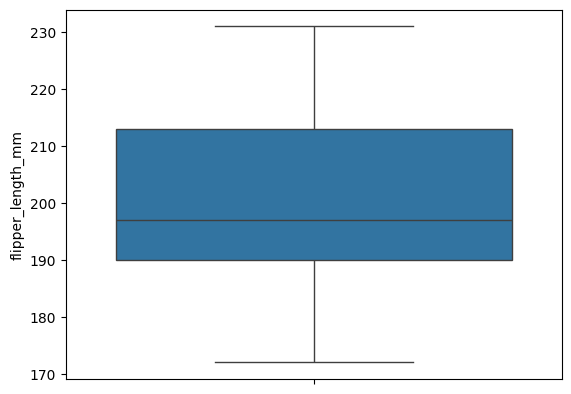

In [41]:
sns.boxplot(df.flipper_length_mm)

In [42]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,344.000000,344.000000,344.000000,344.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.443643,1.969027,14.020657,799.613058
min,32.100000,13.100000,172.000000,2700.000000
25%,39.275000,15.600000,190.000000,3550.000000
50%,44.250000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [19]:
q1=df.flipper_length_mm.quantile(0.25)
q1

190.0

In [20]:
q3=df.flipper_length_mm.quantile(0.75)
q3

213.0

In [21]:
IQR=q3-q1
IQR

23.0

In [22]:
upper_limit=q3+1.5*IQR
upper_limit

247.5

In [24]:
lower_length=q1-1.5*IQR
lower_length

155.5

In [25]:
df.flipper_length_mm.median()

197.0

In [27]:
df['flipper_length_mm']=np.where(df['flipper_length_mm']>upper_limit,30,df['flipper_length_mm'])

<Axes: ylabel='flipper_length_mm'>

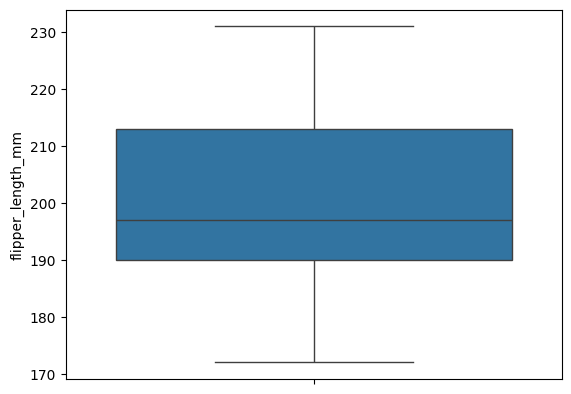

In [28]:
sns.boxplot(df.flipper_length_mm)

##8) Checking for categorical columns and performing encoding

In [43]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [44]:
df.sex = le.fit_transform(df.sex)

In [45]:
df.head(30)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,2
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,1
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,1
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,3
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,1
5,Adelie,Torgersen,39.30000,20.60000,190.000000,3650.000000,2
6,Adelie,Torgersen,38.90000,17.80000,181.000000,3625.000000,1
7,Adelie,Torgersen,39.20000,19.60000,195.000000,4675.000000,2
8,Adelie,Torgersen,34.10000,18.10000,193.000000,3475.000000,3
9,Adelie,Torgersen,42.00000,20.20000,190.000000,4250.000000,3


##9) Splitting the data into dependent and independent variables

In [53]:
x=df.drop(columns=['species','island'],axis=1)
x.head(10)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.10000,18.70000,181.000000,3750.000000,2
1,39.50000,17.40000,186.000000,3800.000000,1
2,40.30000,18.00000,195.000000,3250.000000,1
3,43.92193,17.15117,200.915205,4201.754386,3
4,36.70000,19.30000,193.000000,3450.000000,1
5,39.30000,20.60000,190.000000,3650.000000,2
6,38.90000,17.80000,181.000000,3625.000000,1
7,39.20000,19.60000,195.000000,4675.000000,2
8,34.10000,18.10000,193.000000,3475.000000,3
9,42.00000,20.20000,190.000000,4250.000000,3


In [57]:
y=df.sex
y.head(10)

0    2
1    1
2    1
3    3
4    1
5    2
6    1
7    2
8    3
9    3
Name: sex, dtype: int64

##10) Perform Scaling

In [49]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()

In [55]:
x_scaled=pd.DataFrame(scale.fit_transform(x),columns=x.columns)
x_scaled.head(10)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0.254545,0.666667,0.152542,0.291667,0.666667
1,0.269091,0.511905,0.237288,0.305556,0.333333
2,0.298182,0.583333,0.389831,0.152778,0.333333
3,0.429888,0.482282,0.490088,0.417154,1.000000
4,0.167273,0.738095,0.355932,0.208333,0.333333
5,0.261818,0.892857,0.305085,0.263889,0.666667
6,0.247273,0.559524,0.152542,0.256944,0.333333
7,0.258182,0.773810,0.389831,0.548611,0.666667
8,0.072727,0.595238,0.355932,0.215278,1.000000
9,0.360000,0.845238,0.305085,0.430556,1.000000


In [56]:
df.shape

(344, 7)

##11) Split the data into training and testing

In [58]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.3,random_state=42)

In [59]:
x_train.shape

(240, 5)

In [60]:
x_test.shape

(104, 5)

In [61]:
x_train.head(10)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
31,0.185455,0.595238,0.101695,0.333333,0.666667
245,0.509091,0.238095,0.728814,0.666667,0.666667
277,0.487273,0.226190,0.813559,0.638889,0.666667
165,0.723636,0.595238,0.491525,0.375000,0.666667
250,0.552727,0.261905,0.847458,0.708333,0.666667
126,0.243636,0.535714,0.322034,0.159722,0.333333
282,0.494545,0.095238,0.711864,0.472222,0.333333
59,0.200000,0.714286,0.372881,0.291667,0.666667
111,0.490909,0.857143,0.322034,0.527778,0.666667
197,0.680000,0.642857,0.491525,0.486111,0.666667


In [64]:
y_train

31     2
245    2
277    2
165    2
250    2
      ..
188    1
71     2
106    1
270    1
102    1
Name: sex, Length: 240, dtype: int64

In [65]:
y_test

194    2
157    1
225    1
208    1
318    1
      ..
79     2
108    1
18     1
116    1
266    1
Name: sex, Length: 104, dtype: int64

##12) Performing machine learning model building

In [66]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(random_state=42)
model

RandomForestClassifier(random_state=42)

##13) Training the model

In [67]:
model.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

##14) Evalute the model

In [69]:
y_pred=model.predict(x_test)
y_pred

array([2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1,
       2, 3, 2, 1, 2, 2, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1,
       3, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 1, 1, 1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2,
       1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1])

In [70]:
y_pred1=model.predict(x_train)
y_pred1

array([2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 3,
       1, 1, 2, 1, 3, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2,
       1, 1, 2, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2,
       3, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2,
       2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1,
       2, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 3, 1, 2, 1, 1, 1,
       1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 3, 3, 1, 1, 3, 1, 2, 2, 1,
       2, 1, 1, 1, 1, 1, 2, 1, 3, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1,
       2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2,
       2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1,
       1, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1])

In [73]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score,roc_curve

In [74]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.98      1.00      0.99        49
           2       1.00      1.00      1.00        52
           3       1.00      1.00      1.00         2

    accuracy                           0.99       104
   macro avg       0.74      0.75      0.75       104
weighted avg       0.98      0.99      0.99       104



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [75]:
print(confusion_matrix(y_test,y_pred))

[[ 0  1  0  0]
 [ 0 49  0  0]
 [ 0  0 52  0]
 [ 0  0  0  2]]


In [76]:
pd.crosstab(y_test,y_pred)

col_0,1,2,3
sex,,,
0,1,0,0
1,49,0,0
2,0,52,0
3,0,0,2


In [77]:
accuracy_score(y_train,y_pred1)

1.0

In [78]:
accuracy_score(y_test,y_pred)

0.9903846153846154

In [85]:
probability = model.predict_proba(x_test)[:,1]
probability

array([0.97, 0.02, 0.  , 0.  , 0.02, 1.  , 1.  , 0.  , 0.08, 0.  , 0.01,
       0.  , 0.  , 0.  , 0.08, 1.  , 0.01, 0.85, 1.  , 1.  , 1.  , 0.02,
       1.  , 0.44, 0.97, 0.  , 1.  , 1.  , 0.  , 0.01, 0.99, 0.01, 0.12,
       0.83, 1.  , 0.  , 0.99, 0.01, 0.99, 0.98, 0.  , 0.02, 1.  , 0.02,
       0.11, 1.  , 1.  , 0.  , 0.85, 0.  , 0.99, 0.97, 1.  , 1.  , 0.96,
       0.04, 0.  , 0.9 , 1.  , 1.  , 1.  , 1.  , 0.98, 1.  , 1.  , 0.  ,
       1.  , 0.  , 0.01, 0.  , 0.95, 1.  , 0.  , 0.98, 1.  , 1.  , 0.  ,
       0.  , 0.01, 0.01, 0.  , 0.02, 0.98, 0.  , 0.02, 0.  , 1.  , 0.82,
       0.  , 0.96, 1.  , 0.15, 1.  , 0.98, 0.  , 0.98, 0.87, 0.98, 0.  ,
       1.  , 0.  , 0.  , 0.  , 0.  ])

##15) Testing with random observations

In [84]:
df1=pd.DataFrame({'Acutual_value': y_test,'Predicted_value':y_pred})

In [86]:
df1.tail(20)

,Acutual_value,Predicted_value
202,1,1
152,1,1
17,2,2
24,2,2
238,1,1
145,2,2
209,2,2
254,1,1
287,2,2
139,2,2
